<p align="center">
  <font size="8"><b>Synthesis of Leaky Integrate-and-Fire Neuron Models</b></font><br>
  <font size="5"><i>Exploring LIF, Quadratic LIF, Exponential IF, and Adaptive Exponential IF</i></font><br><br>
  <font size="4"><b>Author: Zahra Helalizadeh</b></font>
</p>

<blockquote>
This notebook provides a comprehensive overview and implementation of several foundational neuron models used in computational neuroscience.  
You will find detailed explanations, theoretical backgrounds, and code implementations for the Leaky Integrate-and-Fire (LIF) model, Exponential Integrate-and-Fire, and Adaptive Exponential Integrate-and-Fire models.  
Both library-based and from-scratch implementations are included to deepen understanding of neuronal dynamics and spiking behaviors.  
</blockquote>


# 1. Introduction

## 1.1 Overview of Integrate-and-Fire Neuron Models

Integrate-and-fire (IF) models are among the simplest and most influential mathematical abstractions used to describe neuronal behavior. These models capture the essential features of neuronal membrane potential dynamics and spike generation without simulating the full biophysical complexity of real neurons.

The fundamental concept behind IF models is that a neuron integrates incoming synaptic inputs over time. When the membrane potential reaches a certain threshold, the neuron emits a spike (or action potential), and the potential is reset, often followed by a refractory period.

One of the key advantages of IF models is their balance between biological realism and computational efficiency, making them suitable for both theoretical analyses and large-scale simulations.

The classical Leaky Integrate-and-Fire (LIF) model serves as a foundational framework, describing subthreshold membrane dynamics with a leaky capacitor analogy. However, to better approximate various aspects of real neuron behavior—such as nonlinear spike initiation, spike frequency adaptation, and richer subthreshold dynamics—several extensions of the LIF model have been developed.

This notebook explores the following models in detail:

1. **Leaky Integrate-and-Fire (LIF)**: The standard model, where the membrane potential follows a first-order differential equation and resets upon reaching threshold.

2. **Quadratic Integrate-and-Fire (QIF)**: A nonlinear variant where the voltage dynamics near threshold follow a quadratic form, capturing class I excitability.

3. **Exponential Integrate-and-Fire (EIF)**: Incorporates an exponential term in the voltage equation to mimic the rapid upswing of spike initiation more faithfully.

4. **Adaptive Exponential Integrate-and-Fire (AdEx)**: Adds an adaptation mechanism to EIF, allowing the model to reproduce various spiking patterns such as bursting and adaptation.

Each model is analyzed through its governing equations, qualitative behavior, and how it contributes to our understanding of neural computation.

## 1.2 Purpose of this Notebook

This notebook is intended as a concise yet comprehensive guide to understanding and simulating core integrate-and-fire neuron models. By exploring both classical and extended versions of these models, the notebook aims to provide insight into how simplified mathematical frameworks can effectively represent complex neural dynamics.

The primary objectives are:

1. To introduce the mathematical formulations behind various integrate-and-fire models, including the Leaky Integrate-and-Fire (LIF), Quadratic Integrate-and-Fire (QIF), Exponential Integrate-and-Fire (EIF), and Adaptive Exponential Integrate-and-Fire (AdEx) neurons.

2. To compare the behavior of these models in response to different input currents, highlighting the similarities and distinctions in their spiking patterns and subthreshold dynamics.

3. To provide visual intuition through simulation plots that demonstrate how each model responds over time.

This notebook is especially useful for students and researchers seeking a practical entry point into neuron modeling, bridging the gap between biophysical detail and computational tractability.

## 1.3 Tools and Libraries Used

To implement and simulate the neuron models explored in this notebook, we rely on a set of essential Python libraries that support numerical computation, visualization, and scientific modeling.

NumPy is used for efficient numerical operations, especially in handling arrays, mathematical functions, and time discretization required for solving differential equations.

Matplotlib serves as the primary tool for plotting membrane potentials, input currents, and spike patterns, enabling visual analysis of neuronal dynamics.

SciPy is employed for its integration methods when simulating the continuous-time differential equations that describe neuron models, especially in more complex cases where analytical solutions are not feasible.

Together, these tools form a minimal yet powerful ecosystem that allows for flexible and extensible modeling of neural dynamics in computational neuroscience. The design of the notebook prioritizes clarity, reproducibility, and ease of experimentation, making it accessible for both beginners and advanced users in the field.

# 2. Leaky Integrate-and-Fire (LIF) Model  
## 2.1 Theoretical Background  

### 2.1.1 Model Description  
The Leaky Integrate-and-Fire (LIF) model is one of the simplest and most widely used neuron models in computational neuroscience. It captures the essential dynamics of a neuron's membrane potential without simulating the detailed biophysical processes of real neurons. The model treats the neuron as a leaky capacitor that integrates incoming current until a threshold is reached, at which point a spike is emitted and the membrane potential is reset.

This abstraction provides a balance between biological realism and computational efficiency, making the LIF model suitable for large-scale simulations of spiking neural networks. Its simplicity also allows for analytical tractability, aiding in theoretical studies of neural coding and network dynamics.

### 2.1.2 Governing Equations  
The membrane potential $V(t)$ of a LIF neuron evolves according to the following differential equation:

$$ \tau_m \frac{dV(t)}{dt} = - (V(t) - V_{rest}) + R \cdot I(t) $$

Here, $\tau_m$ is the membrane time constant, $V_{rest}$ is the resting potential, $R$ is the membrane resistance, and $I(t)$ is the input current.

When $V(t)$ reaches a fixed threshold $V_{th}$, the neuron emits a spike, and the membrane potential is immediately reset to a specified reset potential $V_{reset}$:

$$
\text{if } V(t) \geq V_{th}, \text{ then }
\begin{cases}
\text{emit spike} \\
V(t) \leftarrow V_{reset}
\end{cases}
$$

This model captures the essential behavior of a neuron integrating inputs over time and firing when a threshold is reached, followed by a reset period.


## 2.2 Implementation Using Libraries  
### 2.2.1 Using neurodynex3.leaky_integrate_and_fire.LIF  
The `neurodynex3` library provides a convenient implementation of the Leaky Integrate-and-Fire neuron model through the `leaky_integrate_and_fire.LIF` class. This class includes parameterizable functions and built-in simulation methods that make it easy to study neuron behavior with default or customized parameters.  

We can explore the module and its example usage with:  
`LIF.getting_started()` and `LIF.print_default_parameters()`.  
This will print default parameter values and a brief overview of usage. The default parameters include:  
- $V_{REST} = -70\, mV$  
- $V_{RESET} = -65\, mV$  
- $V_{THRESHOLD} = -50\, mV$  
- Membrane resistance $R = 10\, M\Omega$  
- Membrane time constant $\tau_m = 8\, ms$  
- Absolute refractory period = $2\, ms$  

nr of spikes: 0


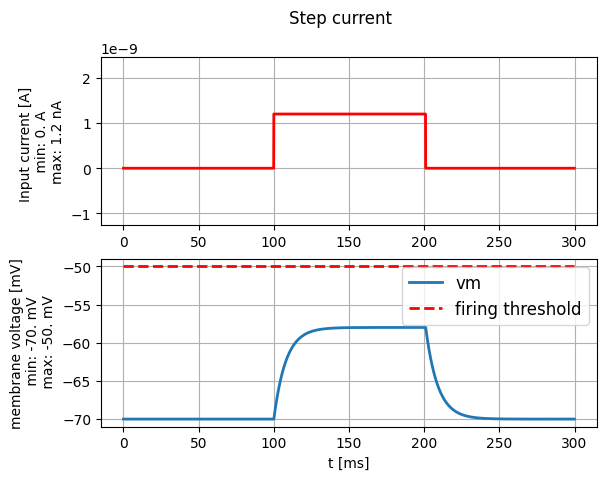

nr of spikes: 5


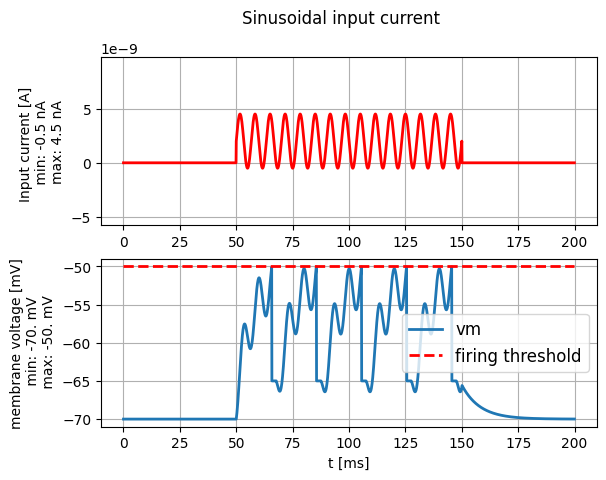

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [ ]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

# Explore default usage and parameters
LIF.getting_started()
LIF.print_default_parameters()

### 2.2.2 Running Default Simulations  
We can run default LIF neuron simulations by calling `simulate_LIF_neuron()` without parameters or by providing custom input currents. Here is an example to simulate a step current injection and plot the results:

Number of spikes: 7


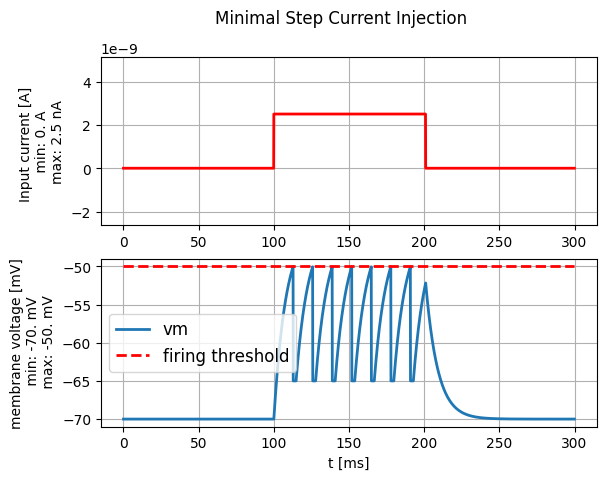

In [ ]:
# Define minimal step current amplitude I_min (example value)
I_min = 2.5 * b2.nA  # compute exact value as needed

# Create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=100, t_end=200, unit_time=b2.ms,
    amplitude=I_min
)

"""
# Define Sine Current
freq = 150 * b2.Hz # Frequency 15 Hz
amplitude = 2.5 * b2.nA # Amplitude is half the peak-to-peak of sinusoid
dc_offset = 2.0 * b2.nA # DC offset is midpoint of min and max

# Create a sine current
sine_current = input_factory.get_sinusoidal_current(
    t_start=500,
    t_end=1500,
    unit_time= 0.1 * b2.ms,
    amplitude=amplitude,
    frequency=freq,
    direct_current=dc_offset,
    phase_offset=0,
    append_zero=True
)
"""

# Run simulation with default parameters
state_monitor, spike_monitor = LIF.simulate_LIF_neuron(
    input_current=step_current,
    simulation_time=300 * b2.ms
)

# Plot voltage and input current traces
plot_tools.plot_voltage_and_current_traces(
    state_monitor, step_current,
    title="Minimal Step Current Injection",
    firing_threshold=LIF.FIRING_THRESHOLD
)

print("Number of spikes:", spike_monitor.count[0])

### 2.2.3 Customizing Parameters  
All neuron parameters can be customized by passing named parameters to `simulate_LIF_neuron()`. We can also simulate neurons with randomized parameters or different refractory periods. This flexibility allows you to experiment with different neuron behaviors and understand the influence of model parameters on the spiking dynamics.


Resting potential: -74. mV
Reset voltage: -75. mV
Firing threshold: 4. mV
Membrane resistance: 14. Mohm
Membrane time-scale: 6. ms
Absolute refractory period: 4. ms


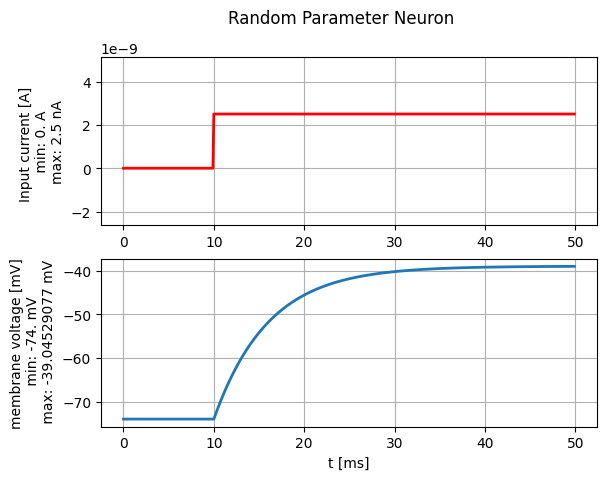

In [ ]:
# Get a random parameter set with fixed seed
random_params = LIF.get_random_param_set(random_seed=43)

# Create a custom test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=60, unit_time=b2.ms, amplitude=2.5 * b2.nA
)

# Simulate neuron with random parameters
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_params)

# Plot results
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="Random Parameter Neuron")

# Print parameters for comparison
LIF.print_obfuscated_parameters(random_params)

## 2.3 Implementation from Scratch (Without Libraries)  
### 2.3.1 Coding the LIF Dynamics in Python  
In this section, we implement the Leaky Integrate-and-Fire (LIF) neuron model from scratch using basic Python and NumPy. The membrane voltage dynamics are governed by the differential equation:  

$$
\tau_m \frac{dV}{dt} = -(V - V_{rest}) + R \cdot I(t)
$$  

where $\tau_m$ is the membrane time constant, $V_{rest}$ is the resting potential, $R$ is the membrane resistance, and $I(t)$ is the input current. When the voltage $V$ reaches the threshold $V_{thresh}$, a spike is generated, the voltage resets to $V_{reset}$, and the neuron enters a refractory period.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
V_rest = -70.0  # mV
V_reset = -65.0  # mV
V_thresh = -50.0  # mV
R = 10.0  # MOhm
tau_m = 8.0  # ms
abs_refractory_period = 2.0  # ms
dt = 0.1  # ms
t_sim = 300.0  # ms

# Time and input current
time = np.arange(0, t_sim, dt)
I = np.zeros_like(time)
I[(time >= 100) & (time <= 200)] = 2.5  # nA step current

"""
# Sinusoidal input current
I = np.zeros_like(time)
sinusoid_mask = (time >= 50) & (time <= 150)
I[sinusoid_mask] = 2.0 + 2.5 * np.sin(2 * np.pi * 150 * (time[sinusoid_mask] - 50) / 1000)
"""

'\n# Sinusoidal input current\nI = np.zeros_like(time)\nsinusoid_mask = (time >= 50) & (time <= 150)\nI[sinusoid_mask] = 2.0 + 2.5 * np.sin(2 * np.pi * 150 * (time[sinusoid_mask] - 50) / 1000)\n'

### 2.3.2 Simulation Loop and Spike Generation  
We simulate the membrane voltage dynamics using the Euler method to approximate the differential equation. We keep track of the last spike time to enforce the absolute refractory period during which the neuron cannot spike.

In [ ]:
# Define lif_simulation function (if not already defined)
def lif_simulation(V_rest, V_reset, V_threshold, R_m, tau_m, I, dt, t_sim, refractory_period):
    time = np.arange(0, t_sim, dt)
    V = np.ones_like(time) * V_rest
    last_spike_time = -np.inf
    spike_times = []

    for i in range(1, len(time)):
        if time[i] < last_spike_time + refractory_period:
            V[i] = V_reset
            continue

        dV = (-(V[i-1] - V_rest) + R_m * I[i-1]) * (dt / tau_m)
        V[i] = V[i-1] + dV

        if V[i] >= V_threshold:
            V[i] = V_reset
            last_spike_time = time[i]
            spike_times.append(time[i])

    return time, V, spike_times

# Run simulation with lif_simulation function
time, V, spike_times = lif_simulation(V_rest, V_reset, V_thresh, R, tau_m, I, dt, t_sim, abs_refractory_period)

### 2.3.3 Plotting Results  
Finally, we plot the membrane voltage trace and input current over time. Spikes are visible as resets in the membrane potential trace.

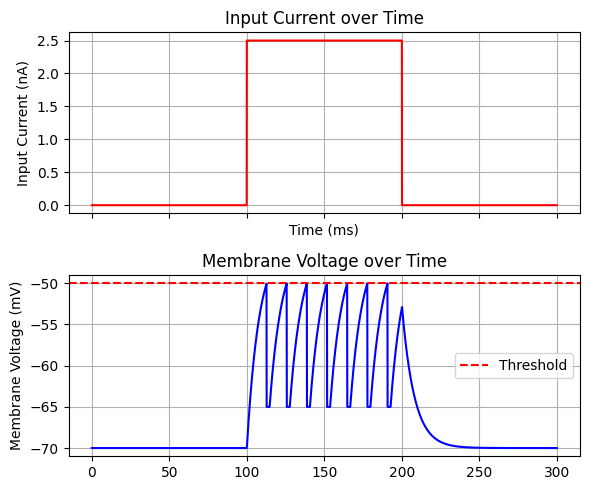

In [ ]:
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

ax1.plot(time, I, color='red')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Input Current (nA)')
ax1.set_title('Input Current over Time')
ax1.grid(True)

ax2.plot(time, V, color='blue')
ax2.axhline(V_thresh, color='red', linestyle='--', label='Threshold')
ax2.set_ylabel('Membrane Voltage (mV)')
ax2.set_title('Membrane Voltage over Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 2.4 Exercises

### 2.4.1 Implementation Using Libraries

#### 2.4.1.1 Minimal Current Calculation and Simulation  
Calculate the minimal current amplitude $I_{\min}$ necessary to elicit a spike for the default LIF neuron parameters. Then simulate the neuron with a step current of amplitude $I_{\min}$ and plot the membrane voltage to verify that it approaches but does not cross the firing threshold.

Minimal current amplitude I_min: 2. nA
Number of spikes: 0


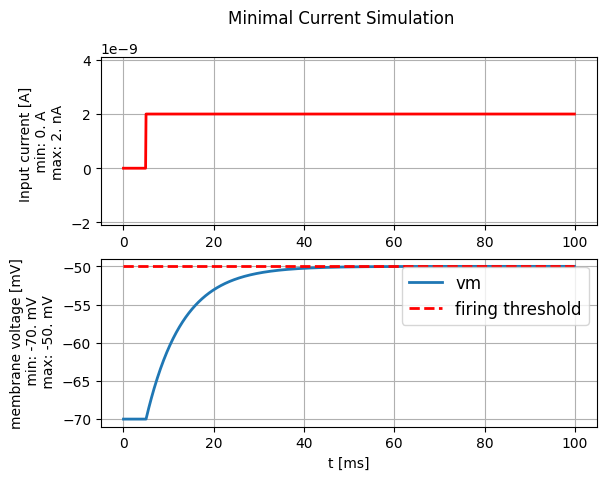

In [ ]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

# Access default resting potential and parameters
V_rest = LIF.V_REST
V_thresh = LIF.FIRING_THRESHOLD
R_m = LIF.MEMBRANE_RESISTANCE
tau_m = LIF.MEMBRANE_TIME_SCALE

# Calculate minimal current amplitude to reach threshold
I_min = (V_thresh - V_rest) / R_m
print(f"Minimal current amplitude I_min: {I_min}")

# Create step current of amplitude I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)

# Simulate LIF neuron with step current
state_monitor, spike_monitor = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time=100 * b2.ms)

# Plot results
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Minimal Current Simulation", firing_threshold=V_thresh)
print(f"Number of spikes: {spike_monitor.count[0]}")

#### 2.4.1.2 F-I Curve Analysis  
Simulate the LIF neuron with constant input currents of varying amplitudes to plot the firing rate (frequency) versus input current amplitude, also known as the f-I curve. Consider a refractory period of 3 ms during the simulation.

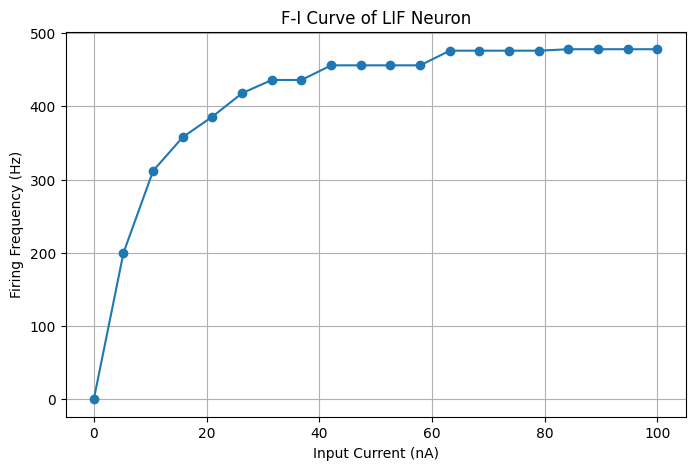

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

currents = np.linspace(0, 100, 20) * b2.namp
frequencies = []

for I in currents:
    step_current = input_factory.get_step_current(t_start=0, t_end=500, unit_time=b2.ms, amplitude=I)
    state_monitor, spike_monitor = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time=500 * b2.ms)
    freq = spike_monitor.count[0] / 0.5  # spikes per second (Hz)
    frequencies.append(freq)

plt.figure(figsize=(8, 5))
plt.plot(currents / b2.namp, frequencies, marker='o')
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Frequency (Hz)')
plt.title('F-I Curve of LIF Neuron')
plt.grid(True)
plt.show()

#### 2.4.1.3 Parameter Estimation from Voltage Trace  
Using a random set of LIF parameters, inject a test current, simulate the neuron's voltage response, and plot the result. Estimate the neuron's parameters visually from the voltage trace and compare them to the true parameters.


Resting potential: -74. mV
Reset voltage: -75. mV
Firing threshold: 4. mV
Membrane resistance: 14. Mohm
Membrane time-scale: 6. ms
Absolute refractory period: 4. ms


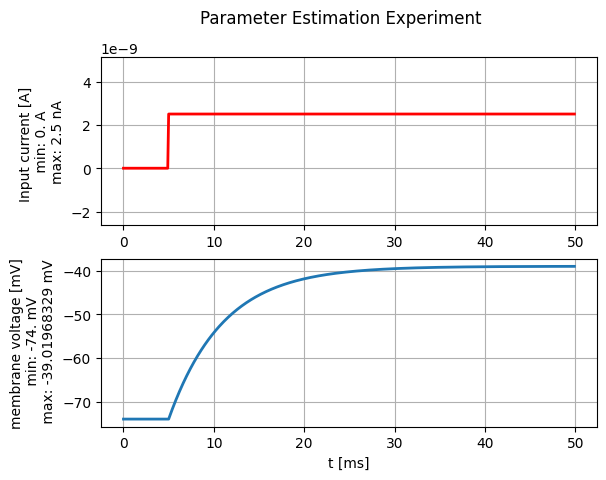

In [ ]:
# Get a random parameter set for the neuron
random_parameters = LIF.get_random_param_set(random_seed=43)

# Define a test step current
test_current = input_factory.get_step_current(
    t_start=5, t_end=50, unit_time=b2.ms, amplitude=2.5 * b2.namp)

# Simulate the neuron with random parameters and test current
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# Plot membrane voltage and input current
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="Parameter Estimation Experiment")

# Print the true parameters for comparison
LIF.print_obfuscated_parameters(random_parameters)

#### 2.4.1.4 Response to Sinusoidal Input Current  
Inject a sinusoidal input current into the LIF neuron with a high firing threshold to avoid spiking, then plot the membrane voltage to observe subthreshold oscillations. Study the frequency response by varying the input frequency.

Number of spikes: 0


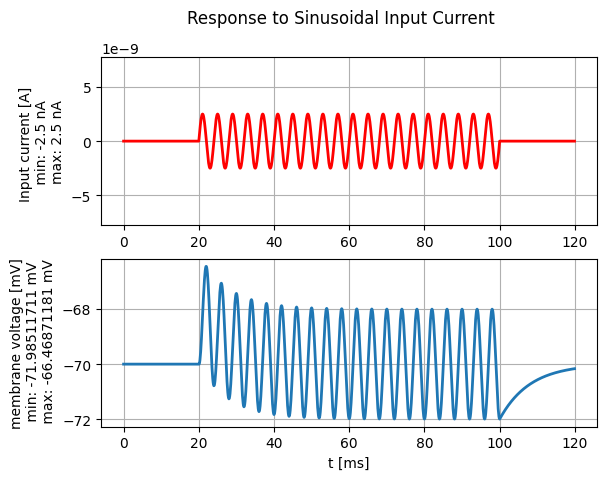

In [ ]:
# Create sinusoidal input current with high resolution
sinusoidal_current = input_factory.get_sinusoidal_current(
    200, 1000, unit_time=0.1 * b2.ms,
    amplitude=2.5 * b2.namp, frequency=250 * b2.Hz,
    direct_current=0. * b2.namp)

# Simulate LIF neuron with high firing threshold to avoid spikes
state_monitor, spike_monitor = LIF.simulate_LIF_neuron(
    input_current=sinusoidal_current, simulation_time=120 * b2.ms, firing_threshold=0 * b2.mV)

# Plot results
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Response to Sinusoidal Input Current")
print(f"Number of spikes: {spike_monitor.count[0]}")

### 2.4.2 Implementation From-Scratch (Without Libraries)

#### 2.4.2.1 Minimal Current Calculation and Simulation

Calculate the minimal input current $I_{\min}$ required to bring the membrane voltage $V_m$ just to the firing threshold $V_{th}$. For the leaky integrate-and-fire neuron model, this can be estimated by solving the steady-state equation:

$$
I_{\min} = \frac{V_{th} - V_{rest}}{R_m}
$$

where $V_{rest}$ is the resting potential and $R_m$ is the membrane resistance.

Simulate the neuron with a step input current of amplitude $I_{\min}$ and observe that the neuron voltage approaches but does not cross the threshold.

Minimal input current I_min = 2.000 nA


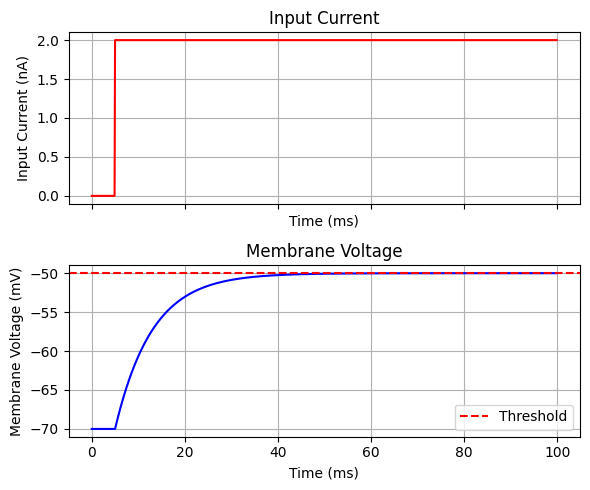

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
V_rest = -70.0  # mV
V_reset = -65.0  # mV
V_th = -50.0  # mV
R_m = 10.0  # MOhm
tau_m = 8.0  # ms
dt = 0.1  # ms
t_sim = 100  # ms
refractory_period = 2.0  # ms

# Calculate minimal input current in nA (I = (Vth - Vrest)/Rm)
I_min = (V_th - V_rest) / R_m  # mV / MOhm = nA
print(f"Minimal input current I_min = {I_min:.3f} nA")

# Time vector
time = np.arange(0, t_sim, dt)

# Input current: step from 5 ms to 100 ms
I = np.zeros_like(time)
I[(time >= 5) & (time <= 100)] = I_min

# Run simulation
time, V, _ = lif_simulation(V_rest, V_reset, V_th, R_m, tau_m, I, dt, t_sim, refractory_period)

# Plotting membrane voltage and input current
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5))
ax1.plot(time, I, 'r')
ax1.set_ylabel('Input Current (nA)')
ax1.set_xlabel('Time (ms)')
ax1.set_title('Input Current')
ax1.grid(True)

ax2.plot(time, V, 'b')
ax2.set_ylabel('Membrane Voltage (mV)')
ax2.set_xlabel('Time (ms)')
ax2.set_title('Membrane Voltage')
ax2.axhline(V_th, color='r', linestyle='--', label='Threshold')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#### 2.4.2.2 F-I Curve Analysis

Analyze the firing rate (frequency) of the neuron as a function of different step input current amplitudes. For each input current $I$, simulate the neuron for 500 ms and count the number of spikes. Plot the firing frequency (Hz) versus input current amplitude.

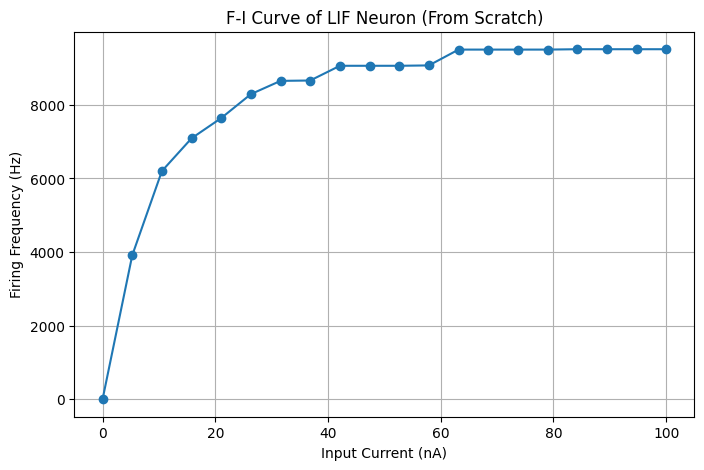

In [ ]:
currents = np.linspace(0, 100, 20)  # nA
frequencies = []

for I_amp in currents:
    I = np.zeros_like(time)
    I[(time >= 0) & (time <= 500)] = I_amp

    # Run the LIF simulation
    _, V, _ = lif_simulation(V_rest, V_reset, V_th, R_m, tau_m, I, dt, t_sim, refractory_period)

    # Count spikes as the number of times voltage resets (crosses threshold)
    # A spike occurs when voltage goes from below threshold to reset voltage
    spikes = np.sum((V[:-1] < V_th) & (V[1:] == V_reset))

    freq = spikes / (t_sim / 1000)  # Hz
    frequencies.append(freq)

plt.figure(figsize=(8, 5))
plt.plot(currents, frequencies, marker='o')
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Frequency (Hz)')
plt.title('F-I Curve of LIF Neuron (From Scratch)')
plt.grid(True)
plt.show()

#### 2.4.2.3 Parameter Estimation from Voltage Trace

Simulate the neuron with a step current of arbitrary amplitude and duration. Observe the voltage trace and estimate parameters such as membrane time constant $\tau_m$ and membrane resistance $R_m$ by analyzing the voltage rise and decay in the subthreshold regime.

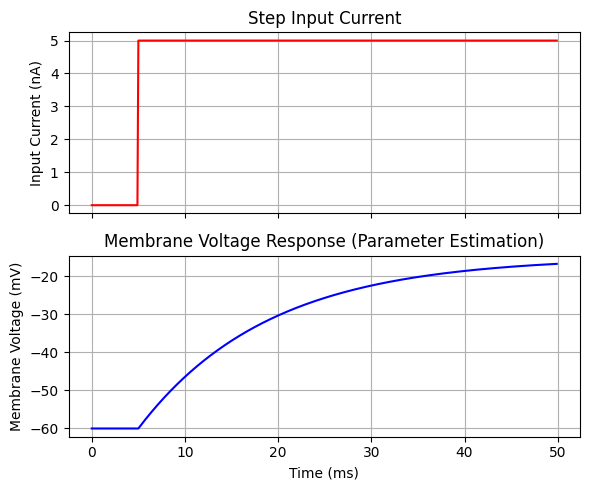

True parameters used for simulation:
V_rest = -60.0 mV
V_reset = -68.0 mV
V_threshold = -16.0 mV
Membrane Resistance (R_m) = 9.0 MΩ
Membrane Time Constant (tau_m) = 14.0 ms
Refractory Period = 2.0 ms


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters (same as before)
np.random.seed(43)
V_rest = -60.0  # mV
V_reset = -68.0  # mV
V_threshold = -16.0  # mV
R_m = 9.0  # MΩ
tau_m = 14.0  # ms
refractory_period = 2.0  # ms

dt = 0.1
t_sim = 50
time = np.arange(0, t_sim, dt)

# Step input current starting at 5 ms
I_amplitude = 5.0  # nA
I_inj = np.zeros_like(time)
I_inj[(time >= 5)] = I_amplitude

# Run the simulation using lif_simulation function
time, V, _ = lif_simulation(V_rest, V_reset, V_threshold, R_m, tau_m, I_inj, dt, t_sim, refractory_period)

# Plot input current and membrane voltage in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5))

ax1.plot(time, I_inj, 'r')
ax1.set_ylabel('Input Current (nA)')
ax1.set_title('Step Input Current')
ax1.grid(True)

ax2.plot(time, V, 'b')
ax2.set_ylabel('Membrane Voltage (mV)')
ax2.set_xlabel('Time (ms)')
ax2.set_title('Membrane Voltage Response (Parameter Estimation)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print parameters
print(f"True parameters used for simulation:")
print(f"V_rest = {V_rest} mV")
print(f"V_reset = {V_reset} mV")
print(f"V_threshold = {V_threshold} mV")
print(f"Membrane Resistance (R_m) = {R_m} MΩ")
print(f"Membrane Time Constant (tau_m) = {tau_m} ms")
print(f"Refractory Period = {refractory_period} ms")

#### 2.4.2.4 Response to Sinusoidal Input Current with Constant Beginning and End

Simulate the LIF neuron response to a sinusoidal input current that starts and ends with a constant baseline current $I_{base}$:

$$
I(t) = \begin{cases}
I_{base}, & t < t_{start} \\
I_{base} + A \sin(2 \pi f (t - t_{start})), & t_{start} \le t \le t_{end} \\
I_{base}, & t > t_{end}
\end{cases}
$$

where $A$ is the sinusoidal amplitude, $f$ is the frequency, and $t_{start}$ and $t_{end}$ define the sinusoidal interval.


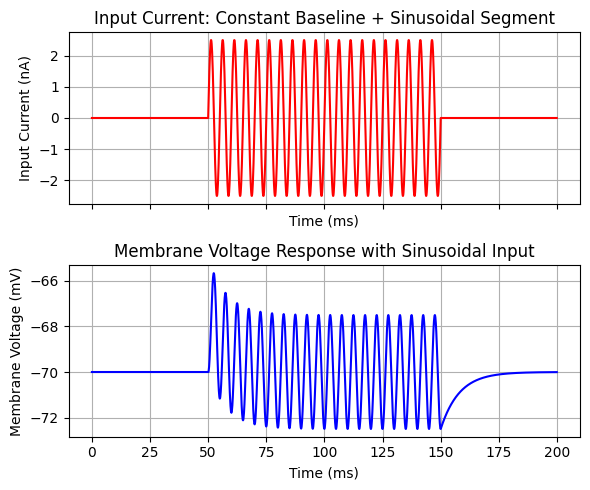

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 2.5  # nA (sinusoidal amplitude)
f = 200  # Hz (sinusoidal frequency)
I_base = 0  # nA (constant baseline current)
t_sim = 200  # ms total simulation time
t_start = 50  # ms, start time of sinusoidal input
t_end = 150   # ms, end time of sinusoidal input
dt = 0.1  # ms

time = np.arange(0, t_sim, dt)

# Construct input current with constant beginning and end
I = np.ones_like(time) * I_base
sinusoid_time = time[(time >= t_start) & (time <= t_end)] - t_start
I[(time >= t_start) & (time <= t_end)] = I_base + A * np.sin(2 * np.pi * f * sinusoid_time / 1000)

# Parameters for LIF
V_rest = -70.0  # mV
V_reset = -65.0  # mV
V_threshold = 1000  # Very high to avoid spiking
R_m = 10.0  # MOhm
tau_m = 8.0  # ms
refractory_period = 2.0  # ms

# Run simulation
time, V, _ = lif_simulation(V_rest, V_reset, V_threshold, R_m, tau_m, I, dt, t_sim, refractory_period)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5))

ax1.plot(time, I, 'r')
ax1.set_ylabel('Input Current (nA)')
ax1.set_xlabel('Time (ms)')
ax1.set_title('Input Current: Constant Baseline + Sinusoidal Segment')
ax1.grid(True)

ax2.plot(time, V, 'b')
ax2.set_ylabel('Membrane Voltage (mV)')
ax2.set_xlabel('Time (ms)')
ax2.set_title('Membrane Voltage Response with Sinusoidal Input')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 4. Exponential Integrate-and-Fire (ExpIF) Model

## 4.1. Theoretical Background

### 4.1.1. Model Description

The Exponential Integrate-and-Fire (ExpIF) model is a biologically inspired refinement of the Leaky Integrate-and-Fire model. It introduces a nonlinear exponential term to better approximate the rapid upswing in membrane potential observed in real neurons as they approach spike threshold. This nonlinearity captures more accurately the spike initiation dynamics while still maintaining the simplicity and efficiency of integrate-and-fire models. The ExpIF model is particularly useful for simulating large networks of neurons where biological realism and computational efficiency are both important.

### 4.1.2. Governing Equations

The membrane potential dynamics of the ExpIF neuron are described by the following differential equation:

$$
\tau_m \frac{dV}{dt} = -(V - V_{rest}) + \Delta_T \exp\left(\frac{V - V_{th}}{\Delta_T}\right) + R \cdot I(t)
$$

Here:

* \$V\$ is the membrane potential,
* \$V\_{rest}\$ is the resting potential,
* \$V\_{th}\$ is the firing threshold,
* \$\Delta\_T\$ is the slope factor that controls the sharpness of spike initiation,
* \$R\$ is the membrane resistance,
* \$I(t)\$ is the input current,
* \$\tau\_m\$ is the membrane time constant.

When the membrane potential \$V\$ reaches a peak value (often set arbitrarily high), a spike is recorded and the membrane potential is reset to \$V\_{reset}\$ and clamped for a refractory period. The exponential term introduces a nonlinear acceleration as the potential nears the threshold, which allows this model to bridge the gap between simple integrate-and-fire models and more complex conductance-based models.

## 4.2. Implementation Using Libraries

### 4.2.1. Using neurodynex3.exponential_integrate_fire.exp_IF

The `neurodynex3.exponential_integrate_fire.exp_IF` module implements the exponential integrate-and-fire neuron dynamics as described in equation 5.6 of the *Neuronal Dynamics* book. This model introduces an exponential term that models the rapid upswing of membrane potential during spike initiation.

We use the `input_factory` to generate external currents, simulate the neuron using `simulate_exponential_IF_neuron`, and visualize results with `plot_tools`.

Below is a minimal example where a step current is injected into the neuron.

nr of spikes: 7


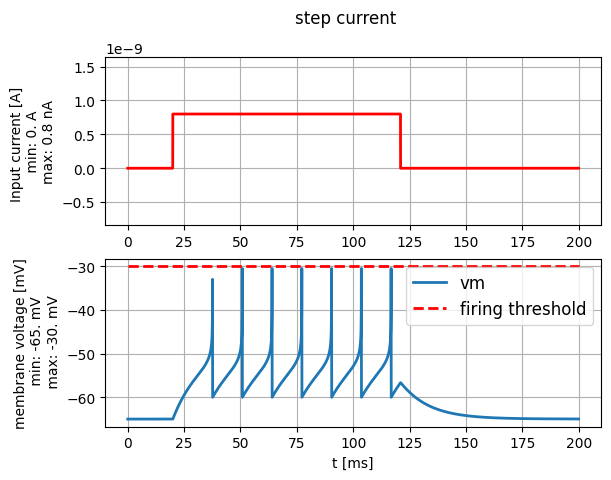

In [ ]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

# Define step current
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

# Run the simulation
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200 * b2.ms)

# Plot results
plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

### 4.2.2. Running Simulations and Customizing Parameters

The simulation function `simulate_exponential_IF_neuron()` allows customization of the model parameters. The default values are:

- $V_{rest} = -65$ mV
- $V_{reset} = -60$ mV
- $v_{rh} = -55$ mV (rheobase threshold)
- $v_{spike} = -30$ mV (spike detection threshold)
- $\tau = 12$ ms (membrane time constant)
- $R = 20$ M$\Omega$ (membrane resistance)
- $\Delta_T = 2$ mV (spike onset sharpness)

Below is an exercise to empirically determine the minimal input current amplitude that causes a spike (the rheobase current) for different pulse durations.

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

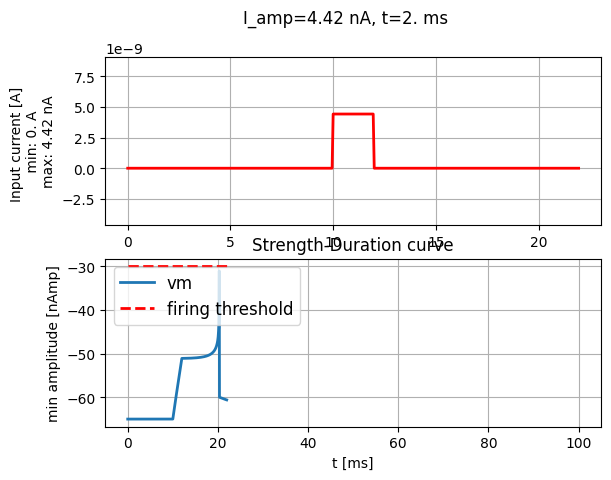

In [ ]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

# Rheobase exploration
i = 1  # index into durations and amplitudes
durations = [1,   2,    5,  10,   20,   50, 100]  # ms
min_amp =   [0., 4.42, 0., 1.10, .70, .48, 0.]   # nA

t = durations[i]
I_amp = min_amp[i] * b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t * b2.ms)

input_current = input_factory.get_step_current(
    t_start=10, t_end=10 + t - 1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=(t + 20) * b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,
    title=title_txt,
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
    legend_location=2)

print("nr of spikes: {}".format(spike_monitor.count[0]))

# Plot the strength-duration curve
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

## 4.3. Implementation from Scratch

This section presents a from-scratch implementation of the Exponential Integrate-and-Fire (ExpIF) neuron model using Python. The model is governed by the differential equation:

$$
\tau_m \frac{dV}{dt} = -(V - V_{rest}) + \Delta_T \exp\left(\frac{V - V_T}{\Delta_T}\right) + R I(t)
$$

where $V$ is the membrane potential, $V_{rest}$ is the resting potential, $V_T$ is the rheobase threshold, $\Delta_T$ controls the steepness of the spike onset, and $I(t)$ is the injected current. A spike is emitted when $V$ reaches the firing threshold $V_{spike}$, after which the voltage is reset to $V_{reset}$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_exp_if_simulation(
    V_rest,
    V_reset,
    V_spike,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    total_time,
    abs_refractory_period,
    I
):
    time = np.arange(0, total_time, dt)
    n_steps = len(time)

    V = np.full(n_steps, V_rest)
    spikes = np.zeros(n_steps)
    refractory_counter = 0

    refractory_steps = int(abs_refractory_period / dt)

    for t in range(1, n_steps):
        if refractory_counter > 0:
            # During refractory, hold voltage at reset value
            V[t] = V_reset
            refractory_counter -= 1
            continue

        # Compute membrane potential change
        dV = (-(V[t - 1] - V_rest) + Delta_T * np.exp((V[t - 1] - V_T) / Delta_T) + R * I[t - 1]) * (dt / tau_m)
        V[t] = V[t - 1] + dV

        # Spike detection and reset
        if V[t] >= V_spike:
            V[t] = V_spike  # Clip at spike voltage (not threshold)
            spikes[t] = 1
            refractory_counter = refractory_steps  # Start refractory period from next step
            # Reset voltage from next step (handled by refractory period)

    return time, V, I, spikes

### 4.3.2. Simulation Loop and Spike Generation

We now define the input current externally and run the ExpIF simulation using the function `run_exp_if_simulation`. All parameters, including the input current array `I`, are passed explicitly.

In [ ]:
# Define simulation time base
dt = 0.1
total_time = 200.0
time = np.arange(0, total_time, dt)

# Define input current externally
I = np.zeros_like(time)
stim_start = 20.0
stim_end = 120.0
I_amp = 0.8
I[int(stim_start / dt):int(stim_end / dt)] = I_amp

# Define neuron parameters
V_rest = -65.0
V_reset = -60.0
V_thresh = -30.0
V_T = -55.0
Delta_T = 2.0
R = 20.0
tau_m = 12.0
abs_refractory_period = 2.0

# Run simulation
time, V, I, spikes = run_exp_if_simulation(
    V_rest,
    V_reset,
    V_thresh,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    total_time,
    abs_refractory_period,
    I
)

### 4.3.3. Visualization

The results are visualized by plotting the membrane potential and input current over time. Spike events are highlighted in red.

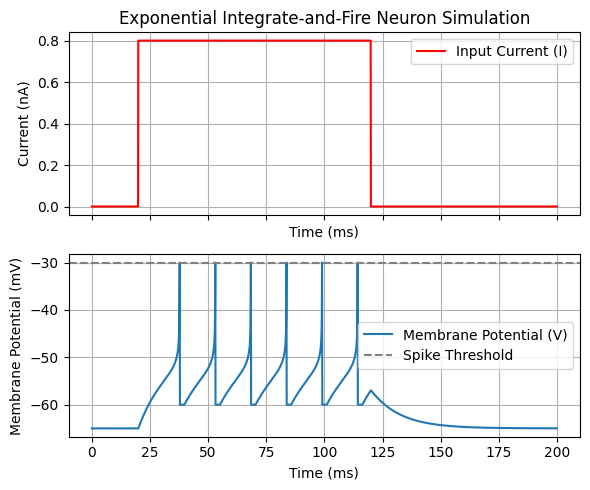

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

# Plot input current in red
axs[0].plot(time, I, label="Input Current (I)", color='red')
axs[0].set_ylabel("Current (nA)")
axs[0].set_xlabel("Time (ms)")
axs[0].legend()
axs[0].set_title("Exponential Integrate-and-Fire Neuron Simulation")
axs[0].grid(True)

# Plot membrane potential and spikes
axs[1].plot(time, V, label="Membrane Potential (V)")
axs[1].axhline(y=V_thresh, color='gray', linestyle='--', label="Spike Threshold")
axs[1].set_ylabel("Membrane Potential (mV)")
axs[1].set_xlabel("Time (ms)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 4.4. Exercises

This section provides hands-on exercises using the `neurodynex3.exponential_integrate_fire.exp_IF` module to deepen your understanding of the ExpIF model. You will compute the rheobase threshold, generate a strength-duration curve, and explore the effects of parameter variation.

### 4.4.1. Exercise Using Libraries

#### 4.4.1.1. Rheobase Threshold Computation

The rheobase is the minimal current amplitude of infinite duration that elicits a spike. The ExpIF neuron has two threshold parameters: $v_{\text{spike}}$ and $v_{\text{rheobase}}$. We explore the effect of changing $v_{\text{spike}}$ and calculate the rheobase current.

Number of spikes: 26


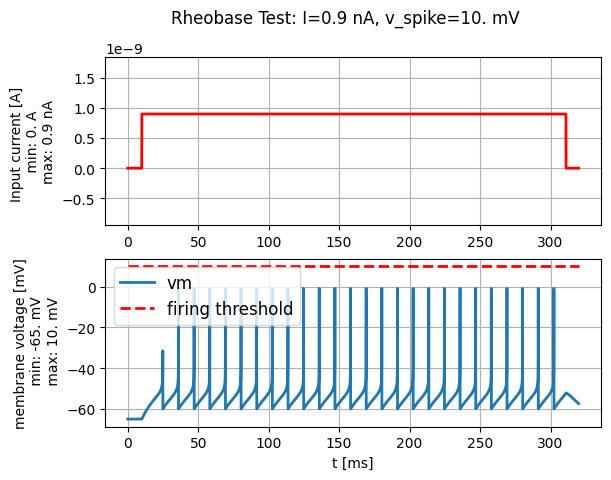

In [ ]:
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

def simulate_rheobase(amplitude_nA, duration_ms, v_spike=-30.0 * b2.mV):
    input_current = input_factory.get_step_current(
        t_start=10, t_end=10 + duration_ms, unit_time=b2.ms, amplitude=amplitude_nA * b2.namp)

    state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
        I_stim=input_current,
        simulation_time=(duration_ms + 20) * b2.ms,
        v_spike=v_spike
    )

    plot_tools.plot_voltage_and_current_traces(
        state_monitor,
        input_current,
        title=f"Rheobase Test: I={amplitude_nA} nA, v_spike={v_spike}",
        firing_threshold=v_spike
    )
    print("Number of spikes:", spike_monitor.count[0])

simulate_rheobase(amplitude_nA=0.9, duration_ms=300, v_spike=10 * b2.mV)

#### 4.4.1.2. Strength-Duration Curve

This exercise explores how the threshold current amplitude varies with stimulus duration. The strength-duration curve is plotted using manually determined threshold amplitudes for various durations.


Duration: 1 ms, Amplitude: 4.6 nA, Spikes: 0
Duration: 2 ms, Amplitude: 4.42 nA, Spikes: 1
Duration: 5 ms, Amplitude: 1.8 nA, Spikes: 0
Duration: 10 ms, Amplitude: 1.1 nA, Spikes: 1
Duration: 20 ms, Amplitude: 0.7 nA, Spikes: 1
Duration: 50 ms, Amplitude: 0.48 nA, Spikes: 1
Duration: 100 ms, Amplitude: 0.4 nA, Spikes: 0


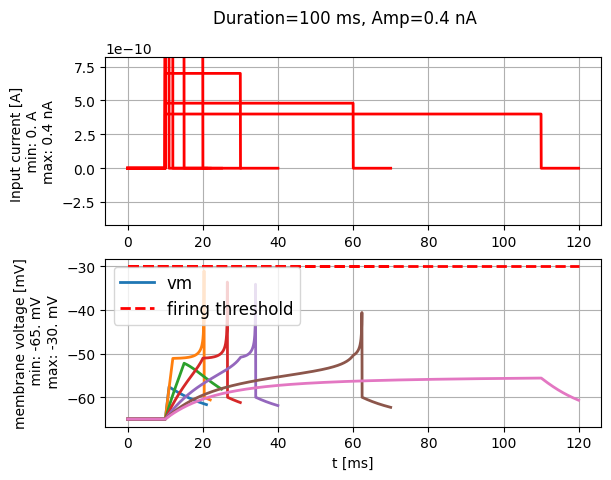

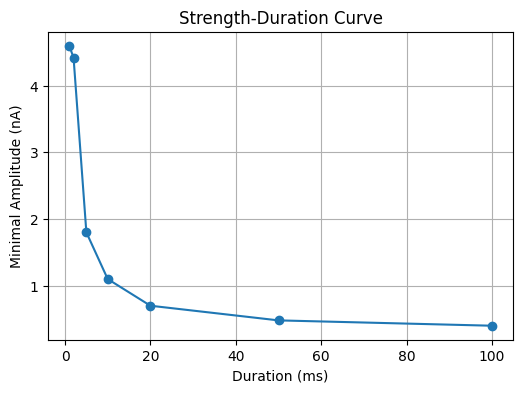

In [ ]:
def plot_strength_duration_curve(durations_ms, min_amplitudes_nA):
    for i in range(len(durations_ms)):
        duration = durations_ms[i]
        amplitude = min_amplitudes_nA[i]
        if amplitude == 0:
            continue  # Skip unset values

        input_current = input_factory.get_step_current(
            t_start=10, t_end=10 + duration - 1, unit_time=b2.ms, amplitude=amplitude * b2.namp)

        sim_time = duration + 20
        title = f"Duration={duration} ms, Amp={amplitude} nA"
        state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
            I_stim=input_current,
            simulation_time=sim_time * b2.ms
        )

        plot_tools.plot_voltage_and_current_traces(
            state_monitor,
            input_current,
            title=title,
            firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
            legend_location=2
        )
        print(f"Duration: {duration} ms, Amplitude: {amplitude} nA, Spikes: {spike_monitor.count[0]}")

    # Plot the strength-duration curve
    plt.figure(figsize=(6, 4))
    plt.plot(durations_ms, min_amplitudes_nA, marker='o')
    plt.xlabel("Duration (ms)")
    plt.ylabel("Minimal Amplitude (nA)")
    plt.title("Strength-Duration Curve")
    plt.grid(True)
    plt.show()

plot_strength_duration_curve([1, 2, 5, 10, 20, 50, 100], [4.6, 4.42, 1.8, 1.10, 0.70, 0.48, 0.40])

#### 4.4.1.3. Effects of Parameter Variation

This exercise attempts to explore the effects of parameter variation on neuron spiking. Due to limitations in the `exp_IF` API, parameters like membrane resistance or sharpness must be hardcoded in the module. For now, we vary the input current and $v_{\text{spike}}$.

Number of spikes: 13


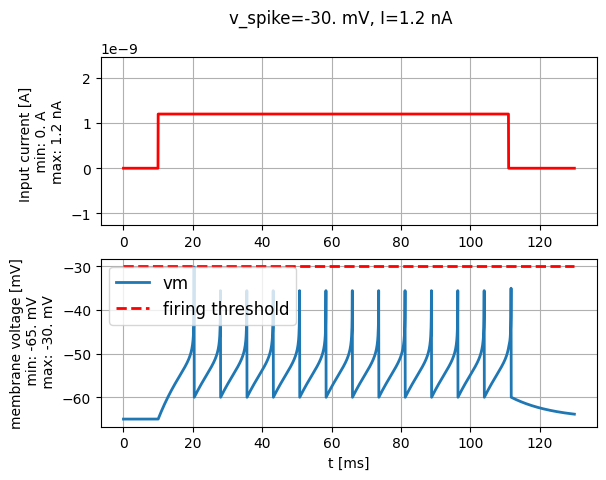

In [ ]:
def simulate_effect_of_vspike_and_current(I_amp_nA, duration_ms, v_spike=-30.0 * b2.mV):
    input_current = input_factory.get_step_current(
        t_start=10, t_end=10 + duration_ms, unit_time=b2.ms, amplitude=I_amp_nA * b2.namp)

    sim_time = duration_ms + 30
    state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
        I_stim=input_current,
        simulation_time=sim_time * b2.ms,
        v_spike=v_spike
    )

    title = f"v_spike={v_spike}, I={I_amp_nA} nA"
    plot_tools.plot_voltage_and_current_traces(
        state_monitor,
        input_current,
        title=title,
        firing_threshold=v_spike
    )
    print("Number of spikes:", spike_monitor.count[0])

simulate_effect_of_vspike_and_current(I_amp_nA=1.2, duration_ms=100, v_spike=-30.0 * b2.mV)

### 4.4.2. Exercise From Scratch (Without Libraries)

#### 4.4.2.1. Rheobase Threshold Computation

In this exercise, we compute the rheobase threshold, which is the minimal current amplitude required to evoke at least one spike in the Exponential Integrate-and-Fire neuron model. We implement the ExpIF neuron dynamics from scratch using Python and simulate the neuron response for varying input currents and durations.

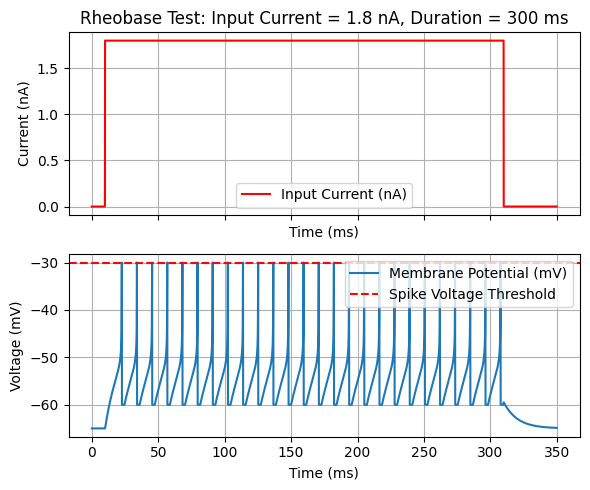

Number of spikes: 26.0


In [ ]:
def simulate_rheobase_threshold(
    amplitude_nA,
    duration_ms,
    V_rest,
    V_reset,
    V_spike,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    abs_refractory_period,
    total_time
):
    # Generate step current input: amplitude for specified duration, zero otherwise
    time = np.arange(0, total_time, dt)
    I = np.zeros_like(time)
    start_idx = int(10 / dt)
    end_idx = int((10 + duration_ms) / dt)
    I[start_idx:end_idx] = amplitude_nA  # nA, current amplitude

    # Run the ExpIF simulation
    time, V, I, spikes = run_exp_if_simulation(
        V_rest=V_rest,
        V_reset=V_reset,
        V_spike=V_spike,
        V_T=V_T,
        Delta_T=Delta_T,
        R=R,
        tau_m=tau_m,
        dt=dt,
        total_time=total_time,
        abs_refractory_period=abs_refractory_period,
        I=I
    )

    # Plot results
    fig, ax = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

    ax[0].plot(time, I, color='red', label='Input Current (nA)')
    ax[0].set_xlabel('Time (ms)')
    ax[0].set_ylabel('Current (nA)')
    ax[0].legend()
    ax[0].set_title(f'Rheobase Test: Input Current = {amplitude_nA} nA, Duration = {duration_ms} ms')
    ax[0].grid(True)

    ax[1].plot(time, V, label='Membrane Potential (mV)')
    ax[1].axhline(V_spike, color='red', linestyle='--', label='Spike Voltage Threshold')
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Voltage (mV)')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    print(f"Number of spikes: {np.sum(spikes)}")

# Example parameters for simulation (all voltages in mV, times in ms, currents in nA, resistance in MOhm)
V_rest = -65.0
V_reset = -60.0
V_spike = -30.0
V_T = -55.0
Delta_T = 2.0
R = 10.0
tau_m = 10.0
dt = 0.1
abs_refractory_period = 2.0
total_time = 350.0

# Run rheobase threshold test
simulate_rheobase_threshold(
    amplitude_nA=1.8,
    duration_ms=300,
    V_rest=V_rest,
    V_reset=V_reset,
    V_spike=V_spike,
    V_T=V_T,
    Delta_T=Delta_T,
    R=R,
    tau_m=tau_m,
    dt=dt,
    abs_refractory_period=abs_refractory_period,
    total_time=total_time
)


#### 4.4.2.2. Strength-Duration Curve

The strength-duration curve shows the relationship between the duration of a step current stimulus and the minimal amplitude required to evoke a spike in the neuron. We simulate the ExpIF neuron for different stimulus durations and find the minimal current amplitude that triggers a spike. This helps characterize the neuron's excitability.

Duration: 1 ms, Amplitude: 9.2 nA, Spikes: 0.0
Duration: 2 ms, Amplitude: 8.84 nA, Spikes: 1.0
Duration: 5 ms, Amplitude: 3.6 nA, Spikes: 1.0
Duration: 10 ms, Amplitude: 2.2 nA, Spikes: 1.0
Duration: 20 ms, Amplitude: 1.4 nA, Spikes: 1.0
Duration: 50 ms, Amplitude: 0.96 nA, Spikes: 1.0
Duration: 100 ms, Amplitude: 0.8 nA, Spikes: 0.0


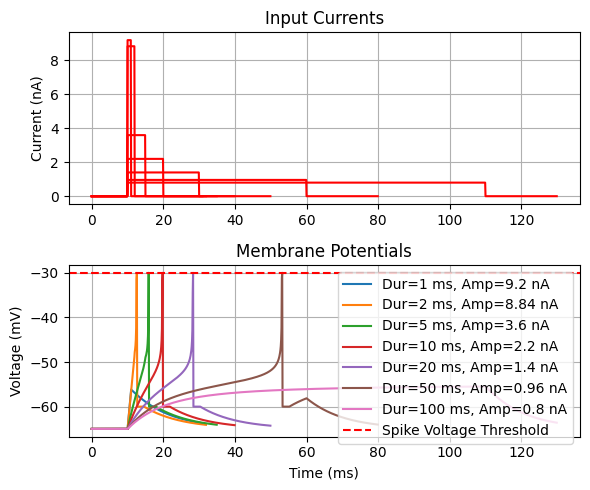

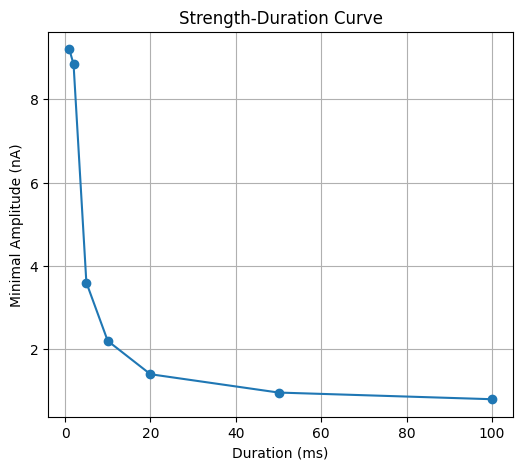

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_strength_duration_curve(
    durations_ms,
    min_amplitudes_nA,
    V_rest,
    V_reset,
    V_spike,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    abs_refractory_period
):
    plt.figure(figsize=(6, 5))

    # Create two subplots: one for currents, one for voltages
    ax1 = plt.subplot(2, 1, 1)  # Currents
    ax2 = plt.subplot(2, 1, 2)  # Voltages

    for i in range(len(durations_ms)):
        duration = durations_ms[i]
        amplitude = min_amplitudes_nA[i]
        if amplitude == 0:
            continue

        total_time = duration + 30
        time = np.arange(0, total_time, dt)
        I = np.zeros_like(time)
        start_idx = int(10 / dt)
        end_idx = int((10 + duration) / dt)
        I[start_idx:end_idx] = amplitude

        time, V, I, spikes = run_exp_if_simulation(
            V_rest=V_rest,
            V_reset=V_reset,
            V_spike=V_spike,
            V_T=V_T,
            Delta_T=Delta_T,
            R=R,
            tau_m=tau_m,
            dt=dt,
            total_time=total_time,
            abs_refractory_period=abs_refractory_period,
            I=I
        )

        ax1.plot(time, I, 'r', label=f"Dur={duration} ms, Amp={amplitude} nA")  # All currents in red
        ax2.plot(time, V, label=f"Dur={duration} ms, Amp={amplitude} nA")
        print(f"Duration: {duration} ms, Amplitude: {amplitude} nA, Spikes: {np.sum(spikes)}")

    ax1.set_title("Input Currents")
    ax1.set_ylabel("Current (nA)")
    ax1.grid(True)

    ax2.axhline(V_spike, color='red', linestyle='--', label='Spike Voltage Threshold')
    ax2.set_title("Membrane Potentials")
    ax2.set_xlabel("Time (ms)")
    ax2.set_ylabel("Voltage (mV)")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot the strength-duration curve
    plt.figure(figsize=(6, 5))
    plt.plot(durations_ms, min_amplitudes_nA, marker='o')
    plt.xlabel("Duration (ms)")
    plt.ylabel("Minimal Amplitude (nA)")
    plt.title("Strength-Duration Curve")
    plt.grid(True)
    plt.show()

# Parameters for simulation
V_rest = -65.0
V_reset = -60.0
V_spike = -30.0
V_T = -55.0
Delta_T = 2.0
R = 10.0
tau_m = 10.0
dt = 0.1
abs_refractory_period = 2.0

# Durations (ms) and minimal amplitudes (nA) approximated from literature/example
durations_ms = [1, 2, 5, 10, 20, 50, 100]
min_amplitudes_nA = [9.2, 8.84, 3.6, 2.20, 1.4, 0.96, 0.8]

plot_strength_duration_curve(
    durations_ms,
    min_amplitudes_nA,
    V_rest,
    V_reset,
    V_spike,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    abs_refractory_period
)

#### 4.4.2.3. Effects of Parameter Variation

In this exercise, we study how varying the spike voltage threshold $V_{spike}$ and input current amplitude $I$ affect the spiking behavior of the Exponential Integrate-and-Fire neuron.


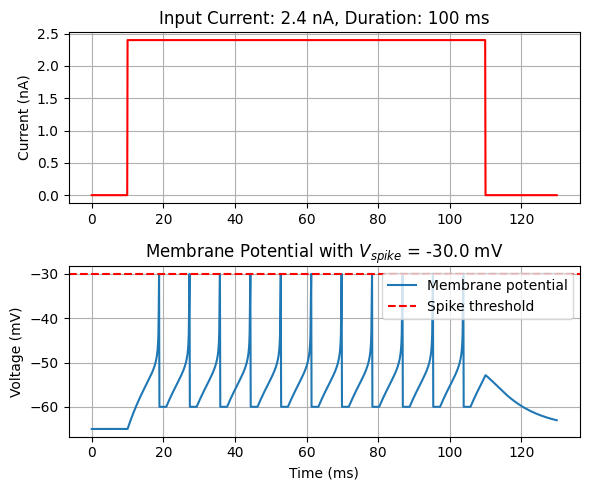

Number of spikes: 11.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_effect_of_vspike_and_current(
    I_amp_nA,
    duration_ms,
    V_rest,
    V_reset,
    V_spike,
    V_T,
    Delta_T,
    R,
    tau_m,
    dt,
    abs_refractory_period
):
    total_time = duration_ms + 30
    time = np.arange(0, total_time, dt)
    I = np.zeros_like(time)
    start_idx = int(10 / dt)
    end_idx = int((10 + duration_ms) / dt)
    I[start_idx:end_idx] = I_amp_nA

    time, V, I, spikes = run_exp_if_simulation(
        V_rest=V_rest,
        V_reset=V_reset,
        V_spike=V_spike,
        V_T=V_T,
        Delta_T=Delta_T,
        R=R,
        tau_m=tau_m,
        dt=dt,
        total_time=total_time,
        abs_refractory_period=abs_refractory_period,
        I=I
    )

    plt.figure(figsize=(6, 5))

    plt.subplot(2, 1, 1)
    plt.plot(time, I, 'r')
    plt.title(f"Input Current: {I_amp_nA} nA, Duration: {duration_ms} ms")
    plt.ylabel("Current (nA)")
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time, V, label='Membrane potential')
    plt.axhline(V_spike, color='red', linestyle='--', label='Spike threshold')
    plt.title(f"Membrane Potential with $V_{{spike}}$ = {V_spike} mV")
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("Number of spikes:", np.sum(spikes))

# Parameters
V_rest = -65.0
V_reset = -60.0
V_spike = -30.0
V_T = -55.0
Delta_T = 2.0
R = 10.0
tau_m = 10.0
dt = 0.1
abs_refractory_period = 2.0

# Run simulation with example parameters
simulate_effect_of_vspike_and_current(
    I_amp_nA=2.4,
    duration_ms=100,
    V_rest=V_rest,
    V_reset=V_reset,
    V_spike=V_spike,
    V_T=V_T,
    Delta_T=Delta_T,
    R=R,
    tau_m=tau_m,
    dt=dt,
    abs_refractory_period=abs_refractory_period
)

# 5. Adaptive Exponential Integrate-and-Fire (AdEx) Model

## 5.1. Theoretical Background

### 5.1.1. Model Description

The Adaptive Exponential Integrate-and-Fire (AdEx) model extends the standard Exponential Integrate-and-Fire (ExpIF) neuron by incorporating an adaptation mechanism. This adaptation term allows the model to better capture the dynamics of real biological neurons, such as spike-frequency adaptation and bursting behavior. The AdEx model introduces a second differential equation to model the adaptation current, which interacts with the membrane potential and influences the spiking behavior of the neuron.

The model is biologically plausible and computationally efficient, making it suitable for large-scale simulations of spiking neural networks.

### 5.1.2. Governing Equations

The dynamics of the AdEx model are described by two coupled differential equations:

1. **Membrane Potential Dynamics**

The membrane potential $V(t)$ evolves according to the equation:

$$
C \frac{dV}{dt} = -g_L (V - E_L) + g_L \Delta_T \exp\left(\frac{V - V_T}{\Delta_T}\right) - w + I(t)
$$

Here:
- $C$ is the membrane capacitance,
- $g_L$ is the leak conductance,
- $E_L$ is the resting potential,
- $\Delta_T$ is the slope factor that governs the sharpness of spike initiation,
- $V_T$ is the effective threshold voltage,
- $w$ is the adaptation current,
- $I(t)$ is the input current.

2. **Adaptation Current Dynamics**

The adaptation current $w(t)$ evolves as:

$$
\tau_w \frac{dw}{dt} = a (V - E_L) - w
$$

Where:
- $\tau_w$ is the adaptation time constant,
- $a$ is the subthreshold adaptation conductance.

3. **Spike Condition and Reset**

When the membrane potential $V$ reaches a predefined spike voltage $V_{\text{spike}}$, a spike is registered, and the following reset mechanism is applied:

$$
V \leftarrow V_{\text{reset}}, \quad w \leftarrow w + b
$$

Where:
- $V_{\text{reset}}$ is the reset voltage after a spike,
- $b$ is the spike-triggered adaptation increment.

This reset introduces a discontinuity in both the membrane potential and the adaptation current, which is essential for modeling realistic neuronal behaviors such as adaptation and bursting.

## 5.2. Implementation Using Libraries

### 5.2.1. Using `neurodynex3.AdEx` Module

To simulate the Adaptive Exponential Integrate-and-Fire (AdEx) model, we use the `neurodynex3.adex_model` module provided by the *Neuronal Dynamics* library. The function `AdEx.simulate_AdEx_neuron()` allows us to run simulations using various parameter settings and observe how the membrane potential and adaptation current evolve over time. The input current can be customized using `input_factory`, and the results can be visualized using `plot_tools`.

Below is an example demonstrating how to simulate an AdEx neuron receiving a step current input.


nr of spikes: 10


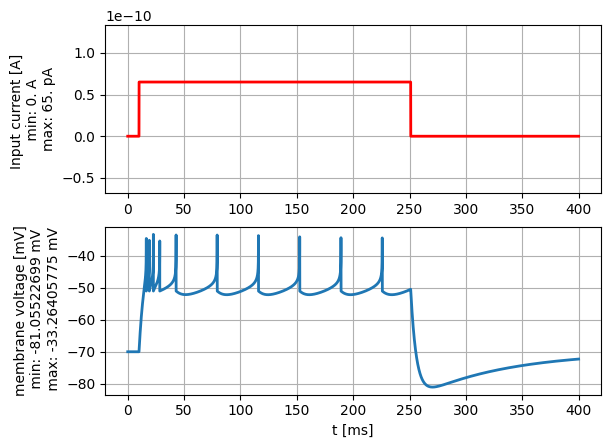

In [ ]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# Define a step current: starts at 10 ms, ends at 250 ms, with a magnitude of 65 pA
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)

# Run the AdEx simulation for 400 ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)

# Plot voltage and current traces
plot_tools.plot_voltage_and_current_traces(state_monitor, current)

# Print the number of spikes
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 5.2.2. Running Simulations

The default parameters used in the simulation include a membrane time constant of $5 \, \text{ms}$, a resting potential of $-70 \, \text{mV}$, and an adaptation conductance of $0.5 \, \text{nS}$. With these settings, the neuron produces an initial burst of spikes followed by adaptation—a behavior resembling Fig. 6.1 in Chapter 6.1 of the *Neuronal Dynamics* textbook.

By modifying the parameters passed to `simulate_AdEx_neuron()`, we can reproduce various firing patterns, such as adapting, bursting, and irregular spiking. These patterns are influenced by the values of adaptation-related parameters $a$, $b$, and $\tau_w$. You are encouraged to explore how these parameters shape the firing dynamics by referring to Table 6.1 and Figures 6.1–6.3 in the book.

To analyze the interplay between the membrane potential $u$ and the adaptation current $w$, we can use:


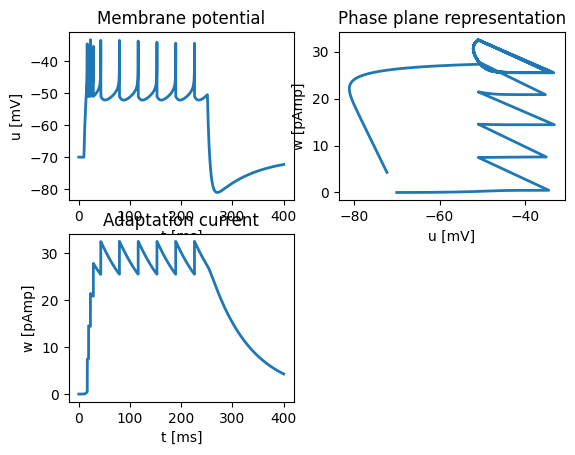

In [ ]:
# Plot the trajectory of (u, w) in the phase plane
AdEx.plot_adex_state(state_monitor)

This phase-plane analysis provides valuable insights into the neuron’s behavior, especially how the nullclines and vector fields evolve under different inputs and adaptation settings.

## 5.3. Implementation from Scratch

### 5.3.1. Coding AdEx Model Dynamics

The Adaptive Exponential Integrate-and-Fire (AdEx) model extends the Exponential Integrate-and-Fire model by including an adaptation current $w$. The model dynamics are governed by two differential equations:

$$ \tau_m \frac{du}{dt} = -(u - u_{\text{rest}}) + \Delta_T \exp\left(\frac{u - \vartheta_{\text{rh}}}{\Delta_T}\right) - Rw + RI(t) $$

$$ \tau_w \frac{dw}{dt} = a(u - u_{\text{rest}}) - w $$

If the membrane potential $u$ exceeds the spike threshold $u_{\text{spike}}$, a spike is registered, the voltage is reset, and the adaptation current is increased by $b$.

Below is a Python function implementing the AdEx model without using external neuron libraries.

In [5]:
import numpy as np

def run_adex_simulation(
    V_rest,
    V_reset,
    V_spike,
    V_rheobase,
    Delta_T,
    R,
    tau_m,
    a,
    b,
    tau_w,
    dt,
    total_time,
    abs_refractory_period,
    I
):
    time = np.arange(0, total_time, dt)
    n_steps = len(time)

    V = np.full(n_steps, V_rest)
    w = np.zeros(n_steps)
    spikes = np.zeros(n_steps)

    for t in range(1, n_steps):
        dV = (
            -(V[t - 1] - V_rest)
            + Delta_T * np.exp((V[t - 1] - V_rheobase) / Delta_T)
            - R * w[t - 1]
            + R * I[t - 1]
        ) * (dt / tau_m)

        dw = (a * (V[t - 1] - V_rest) - w[t - 1]) * (dt / tau_w)

        V[t] = V[t - 1] + dV
        w[t] = w[t - 1] + dw

        if V[t] >= V_spike:
            V[t] = V_reset
            spikes[t] = 1
            w[t] += b

    return time, V, w, I, spikes

### 5.3.2. Simulation and Spike Adaptation Behavior

We now simulate the AdEx model using a step current and visualize the membrane potential $V$ and adaptation current $w$ to observe spike-frequency adaptation.

In [ ]:
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.001  # ms
total_time = 400.0  # ms
time = np.arange(0, total_time, dt)
I = np.zeros_like(time)
I[int(10 / dt):int(250 / dt)] = 20  # nA

# Model parameters
V_rest = -70.0
V_reset = -51.0
V_spike = -30.0
V_rheobase = -50.0
Delta_T = 2.0
R = 2.0  # MOhm
tau_m = 5.0  # ms
a = 0.5  # nS
b = 1.5  # pA
tau_w = 50.0  # ms
abs_refractory_period = 2.0  # ms

time, V, w, I, spikes = run_adex_simulation(
    V_rest,
    V_reset,
    V_spike,
    V_rheobase,
    Delta_T,
    R,
    tau_m,
    a,
    b,
    tau_w,
    dt,
    total_time,
    abs_refractory_period,
    I
)

### 5.3.3. Plotting and Analysis

We now plot the results of the simulation, showing the input current, membrane voltage, and adaptation current over time. The adaptation current $w$ gradually increases during spiking, resulting in spike-frequency adaptation.

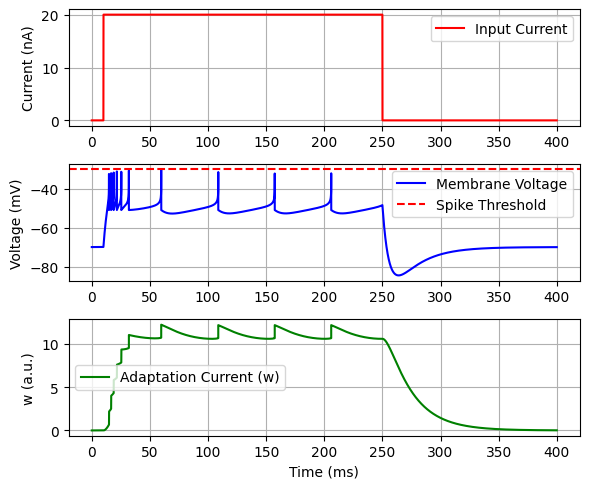

In [ ]:
plt.figure(figsize=(6, 5))

# Plot membrane potential

# Plot input current
plt.subplot(3, 1, 1)
plt.plot(time, I, label="Input Current", color='red')
plt.ylabel("Current (nA)")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time, V, label="Membrane Voltage", color='blue')
plt.axhline(V_spike, color='red', linestyle='--', label='Spike Threshold')
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid(True)

# Plot adaptation current
plt.subplot(3, 1, 3)
plt.plot(time, w, label="Adaptation Current (w)", color='green')
plt.xlabel("Time (ms)")
plt.ylabel("w (a.u.)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 5.3.4. Phase Plane Representation

The phase plane plot shows the trajectory of the neuron's state in the $(V, w)$ space. This helps us analyze the system’s dynamics, such as fixed points, nullclines, and the influence of the adaptation current on voltage evolution.

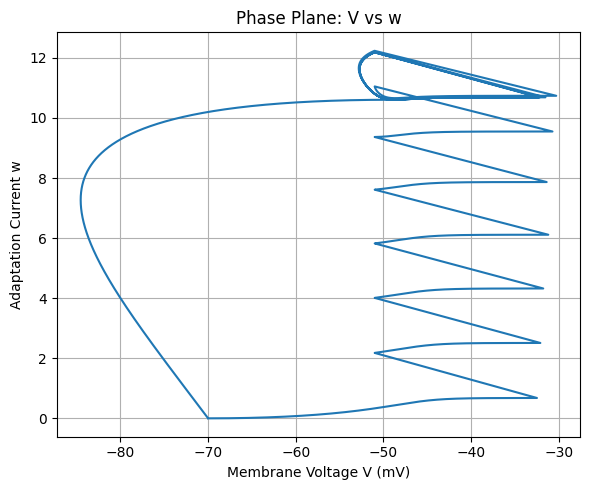

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(V, w)
plt.xlabel("Membrane Voltage V (mV)")
plt.ylabel("Adaptation Current w")
plt.title("Phase Plane: V vs w")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.4. Exercises

### 5.4.1. Exercise Using Libraries

#### 5.4.1.1. Parameter Tuning and Firing Patterns

We simulate the AdEx neuron model using the built-in `simulate_AdEx_neuron()` function from the `neurodynex3.adex_model.AdEx` module. By adjusting parameters like $a$, $b$, and $\tau_w$, we can produce different firing behaviors such as adapting, bursting, or irregular spiking.

Number of spikes: 10


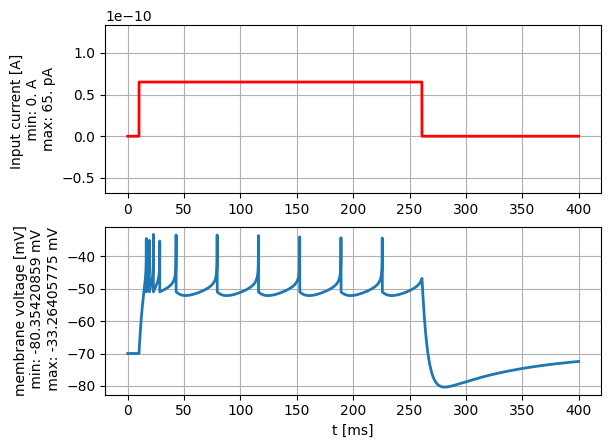

In [1]:
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

def run_adex_pattern(I_amp_pA, duration_ms, simulation_time_ms, a, b, tau_w):
    current = input_factory.get_step_current(
        t_start=10, t_end=10 + duration_ms, unit_time=b2.ms, amplitude=I_amp_pA * b2.pA
    )

    state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        I_stim=current,
        simulation_time=simulation_time_ms * b2.ms,
        a=a * b2.nS,
        b=b * b2.pA,
        tau_w=tau_w * b2.ms
    )

    plot_tools.plot_voltage_and_current_traces(state_monitor, current)
    print("Number of spikes:", spike_monitor.count[0])

# Example: adapting firing
run_adex_pattern(I_amp_pA=65, duration_ms=250, simulation_time_ms=400, a=0.5, b=7.0, tau_w=100)

#### 5.4.1.2. Adaptation Effects on F-I Curves

We now simulate the AdEx model with varying input currents and observe how the firing rate (number of spikes per second) changes. This is known as the frequency-current (F-I) curve. By adjusting the adaptation parameters, we observe how adaptation affects this curve.

I = 20 pA, spikes = 0, firing rate = 0.00 Hz
I = 30 pA, spikes = 0, firing rate = 0.00 Hz
I = 40 pA, spikes = 1, firing rate = 2.50 Hz
I = 50 pA, spikes = 4, firing rate = 10.00 Hz
I = 60 pA, spikes = 8, firing rate = 20.00 Hz
I = 70 pA, spikes = 13, firing rate = 32.50 Hz
I = 80 pA, spikes = 17, firing rate = 42.50 Hz
I = 90 pA, spikes = 22, firing rate = 55.00 Hz
I = 100 pA, spikes = 26, firing rate = 65.00 Hz
I = 110 pA, spikes = 30, firing rate = 75.00 Hz
I = 120 pA, spikes = 35, firing rate = 87.50 Hz


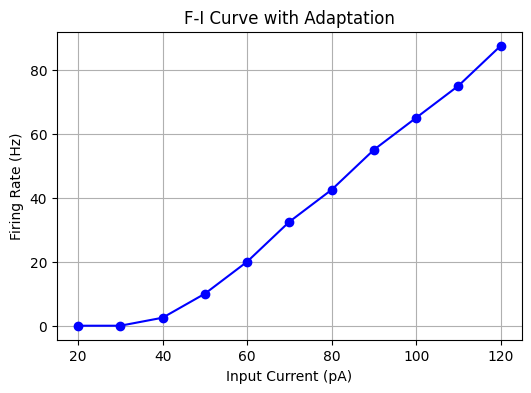

In [2]:
def generate_fi_curve(current_range_pA, duration_ms, sim_time_ms, a, b, tau_w):
    firing_rates = []
    for I_amp in current_range_pA:
        current = input_factory.get_step_current(
            t_start=10, t_end=10 + duration_ms, unit_time=b2.ms, amplitude=I_amp * b2.pA
        )
        state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
            I_stim=current,
            simulation_time=sim_time_ms * b2.ms,
            a=a * b2.nS,
            b=b * b2.pA,
            tau_w=tau_w * b2.ms
        )
        spikes = spike_monitor.count[0]
        rate = spikes / (sim_time_ms / 1000.0)  # spikes per second
        firing_rates.append(rate)
        print(f"I = {I_amp} pA, spikes = {spikes}, firing rate = {rate:.2f} Hz")
    return firing_rates

import matplotlib.pyplot as plt

I_values = range(20, 121, 10)
firing_rates = generate_fi_curve(
    current_range_pA=I_values,
    duration_ms=250,
    sim_time_ms=400,
    a=0.5,
    b=7.0,
    tau_w=100.0
)

plt.figure(figsize=(6, 4))
plt.plot(I_values, firing_rates, marker='o', color='blue')
plt.xlabel("Input Current (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("F-I Curve with Adaptation")
plt.grid(True)
plt.show()

### 5.4.2. Exercise from Scratch

We now implement simulations for the AdEx model without using external libraries. Using our own implementation of the neuron dynamics, we analyze how parameters affect firing patterns and the F-I curve.

#### 5.4.2.1. Parameter Tuning and Firing Patterns

We test different combinations of adaptation parameters $a$, $b$, and $\tau_w$ to observe the resulting firing patterns. This helps us understand the neuron's behavior under adapting, bursting, or tonic spiking conditions.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_adex_dynamics(time, V, I, V_spike, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
    ax1.plot(time, I, color='red')
    ax1.set_ylabel("Input Current (nA)")
    ax1.set_title("Input Current")
    ax1.grid(True)

    ax2.plot(time, V, label="Membrane Voltage", color='blue')
    ax2.axhline(V_spike, color='red', linestyle='--', label="Spike Threshold")
    ax2.set_ylabel("Membrane Potential (mV)")
    ax2.set_xlabel("Time (ms)")
    ax2.set_title(title)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

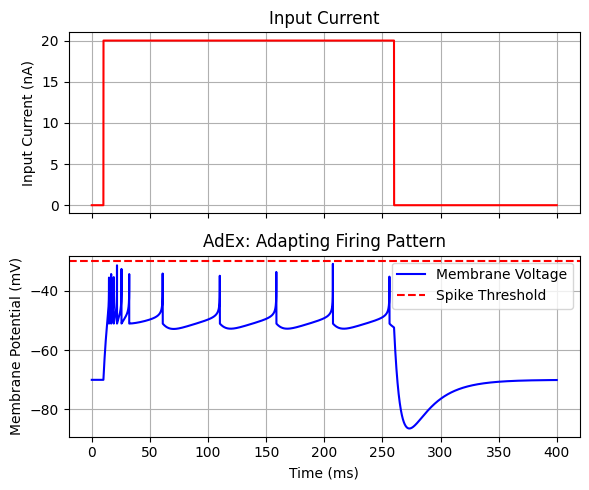

In [11]:
# Common simulation parameters
V_rest = -70.0
V_reset = -51.0
V_spike = -30.0
V_rheobase = -50.0
Delta_T = 2.0
R = 2.0
tau_m = 5.0
dt = 0.01
abs_refractory_period = 2.0
total_time = 400.0

# Generate input current
I = np.zeros(int(total_time / dt))
start_idx = int(10 / dt)
end_idx = int(260 / dt)
I[start_idx:end_idx] = 20  # in nA

# Adapting pattern
time, V, w, I_out, spikes = run_adex_simulation(
    V_rest, V_reset, V_spike, V_rheobase, Delta_T, R,
    tau_m, a=0.5, b=1.5, tau_w=50.0,
    dt=dt, total_time=total_time,
    abs_refractory_period=abs_refractory_period, I=I
)

plot_adex_dynamics(time, V, I_out, V_spike, title="AdEx: Adapting Firing Pattern")

#### 5.4.2.2. Adaptation Effects on F-I Curves

We vary the input current amplitude and observe how the firing rate changes. We then repeat the experiment with and without adaptation to analyze the effect of parameters $a$, $b$, and $\tau_w$ on the F-I curve.

In [12]:
def compute_firing_rate(spikes, sim_time_ms):
    spike_count = np.sum(spikes)
    return spike_count / (sim_time_ms / 1000.0)

def run_fi_curve(I_values, a, b, tau_w):
    firing_rates = []
    for I_amp in I_values:
        I_vec = np.zeros(int(total_time / dt))
        I_vec[start_idx:end_idx] = I_amp
        time, V, w, I_out, spikes = run_adex_simulation(
            V_rest, V_reset, V_spike, V_rheobase, Delta_T, R,
            tau_m, a=a, b=b, tau_w=tau_w,
            dt=dt, total_time=total_time,
            abs_refractory_period=abs_refractory_period, I=I_vec
        )
        rate = compute_firing_rate(spikes, total_time)
        firing_rates.append(rate)
        print(f"I = {I_amp:.3f} nA, spikes = {np.sum(spikes)}, firing rate = {rate:.2f} Hz")
    return firing_rates

In [17]:
# Adjusted F-I curve simulation
I_range = np.arange(5, 35, 2)  # Try currents from 5 nA to 33 nA

# F-I curve with adaptation
rates_adapt = run_fi_curve(I_range, a=0.5, b=7.0, tau_w=100.0)

# F-I curve without adaptation
rates_noadapt = run_fi_curve(I_range, a=0.0, b=0.0, tau_w=1.0)

I = 5.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 7.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 9.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 11.000 nA, spikes = 1.0, firing rate = 2.50 Hz
I = 13.000 nA, spikes = 1.0, firing rate = 2.50 Hz
I = 15.000 nA, spikes = 1.0, firing rate = 2.50 Hz
I = 17.000 nA, spikes = 2.0, firing rate = 5.00 Hz
I = 19.000 nA, spikes = 2.0, firing rate = 5.00 Hz
I = 21.000 nA, spikes = 4.0, firing rate = 10.00 Hz
I = 23.000 nA, spikes = 5.0, firing rate = 12.50 Hz
I = 25.000 nA, spikes = 6.0, firing rate = 15.00 Hz
I = 27.000 nA, spikes = 7.0, firing rate = 17.50 Hz
I = 29.000 nA, spikes = 8.0, firing rate = 20.00 Hz
I = 31.000 nA, spikes = 9.0, firing rate = 22.50 Hz
I = 33.000 nA, spikes = 10.0, firing rate = 25.00 Hz
I = 5.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 7.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 9.000 nA, spikes = 0.0, firing rate = 0.00 Hz
I = 11.000 nA, spikes = 43.0, firing rate = 107.50 Hz
I = 13.000 nA, spikes = 73

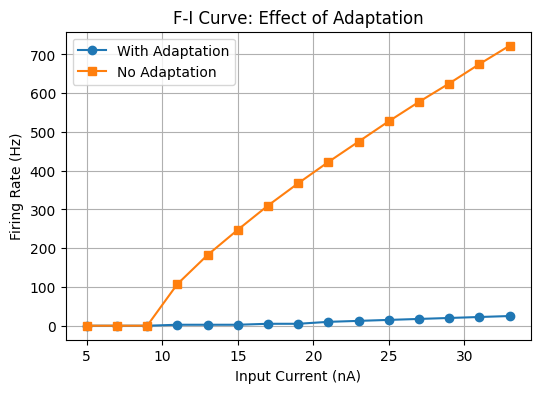

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(I_range, rates_adapt, marker='o', label='With Adaptation')
plt.plot(I_range, rates_noadapt, marker='s', label='No Adaptation')
plt.xlabel("Input Current (nA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("F-I Curve: Effect of Adaptation")
plt.grid(True)
plt.legend()
plt.show()

# 6. Summary and Comparison of Models

## 6.1. Overview of Differences Between Models

The neuron models explored in this notebook include the Leaky Integrate-and-Fire (LIF), Exponential Integrate-and-Fire (ExpIF), and Adaptive Exponential Integrate-and-Fire (AdEx) models. Each builds on the previous by incorporating more biological realism and capturing more complex firing behaviors.

The **LIF model** describes the subthreshold membrane potential as a simple linear differential equation. It captures basic spiking behavior but lacks realism for more complex neuronal dynamics.

The **ExpIF model** introduces an exponential term to model the sharp rise in voltage near the threshold, allowing for a more realistic representation of spike initiation.

The **AdEx model** adds a dynamic adaptation variable to the ExpIF formulation. This additional current models spike-frequency adaptation, enabling the model to reproduce a wide range of firing patterns including regular spiking, bursting, and irregular firing.

In terms of complexity and expressiveness:

- LIF is the simplest and computationally efficient but biologically limited.
- ExpIF improves realism while retaining efficiency.
- AdEx offers the richest dynamics at the cost of higher complexity and computational load.

## 6.2. When to Use Each Model

The choice of neuron model depends on the goals of the simulation:

- Use **LIF** when computational simplicity and scalability are important, such as in large-scale network simulations where fine details of spike generation are not critical.
- Use **ExpIF** when a more biologically plausible spike initiation is desired without the need for adaptation dynamics.
- Use **AdEx** when studying adaptation effects, firing pattern diversity, or matching real neuronal data more closely.

For theoretical analysis or exploratory studies, simpler models like LIF or ExpIF may be preferred. For simulating biophysically detailed behaviors or when capturing diverse spike patterns is necessary, AdEx is more appropriate.

## 6.3. Impact of Parameters on Neuronal Firing Behavior

The firing behavior of neurons is highly sensitive to model parameters. Some key influences include:

- In **LIF**, the membrane resistance $R$ and time constant $\tau_m$ determine how quickly the neuron integrates input.
- In **ExpIF**, the sharpness parameter $\Delta_T$ and the exponential term affect the speed and threshold of spike initiation.
- In **AdEx**, the adaptation parameters $a$, $b$, and $\tau_w$ strongly influence firing patterns:
  - Higher $a$ increases subthreshold adaptation.
  - Higher $b$ introduces stronger spike-triggered adaptation.
  - Larger $\tau_w$ slows down the adaptation process, affecting interspike intervals.

During this study, it was observed that **parameters often had to be adapted when using scratch implementations versus library-based simulations**, even when using nominally the same values. This discrepancy is likely due to differences in numerical integration methods, time step resolution, and implementation details such as handling of thresholds and resets.

As such, precise reproduction of library results may require tuning of parameters and simulation settings, especially when writing code from scratch. Understanding the role of each parameter is essential for interpreting neuronal firing behavior and for building reliable models.
